<h1 align=center><font size = 10>LR</font></h1>

# Bài toán

**Áp dụng mô hình hồi quy vào bài toán dự đoán số người trúng tuyển American College.**

# Pipeline

1. Đọc dữ liệu.

2. Tiền xử lý dữ liệu.

3. Trực quan dữ liệu.

4. Chuẩn bị dữ liệu.

5. Xây dựng mô hình hồi quy tuyến tính đơn biến.

6. Xây dựng mô hình hồi quy tuyến tính đa biến.

7. Xây dựng mô hình hồi quy tuyến tính trên toàn bộ đặc trưng để quan sát mối quan hệ giữa các đặc trưng và mục tiêu.

8. Xây dựng mô hình Lasso để lựa chọn đặc trưng tốt nhất cho mục tiêu.

# Tập dữ liệu

Dự án này liên quan đến tập dữ liệu College, trong file [College.csv](https://drive.google.com/file/d/167ysw5-Bf15_Gm_aiePZfrS3fBWWfJVl/view) . Nó chứa các biến sau cho 777 trường đại học và cao đẳng khác nhau ở Mỹ:

**Private**: Chỉ báo public/private

**Apps**: Số lượng hồ sơ nhận được

**Accept**: Số lượng sinh viên được chấp thuận

**Enroll**: Số sinh viên mới đăng ký

**Top10perc**: Sinh viên mới từ top 10% lớp trung học

**Top25perc**: Sinh viên mới từ top 25% lớp trung học

**F.Undergrad**: Số sinh viên đại học toàn thời gian

**P.Undergrad**: Số sinh viên đại học bán thời gian

**Outstate**: Học phí ngoại bang

**Room.Board**: Chi phí ăn ở

**Books**: Chi phí giáo trình theo ước tính

**Personal**: Chi tiêu cá nhân theo ước tính

**PhD**: Phần trăm giảng viên có bằng Tiến sĩ

**Terminal**: Phần trăm giảng viên có Terminal degree (bẳng cấp cao nhất trong một lĩnh vực nhất định)

**S.F.Ratio**: Tỷ lệ sinh viên/giảng viên

**perc.alumni**: Phần trăm cựu sinh viên đã quyên góp

**Expend**: Chi phí giảng dạy cho mỗi sinh viên

**Grad.Rate**: Tỷ lệ tốt nghiệp

# Thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('ggplot')

# Hàm tiện ích

In [2]:
def drawLine(model, X_test, y_test, title):
    # Hàm vẽ biểu đồ hồi quy khi X_test có 1 đặc trưng
    # và hiển thị hệ số R2
    y_pred = model.predict(X_test)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(X_test, y_test, c='g', marker='o')
    ax.plot(X_test, y_pred, color='orange', linewidth=1, alpha=0.7)
    ax.set_xlabel(title)
    ax.set_ylabel('Accept')

    R2 = r2_score(y_test, y_pred)

    ax.set_title(title)
    print("R2: " + str(R2))
    print("Intercept(s): ", model.intercept_)

    plt.show()

In [3]:
def drawPlane(model, X_test, y_test, title):
    # Hàm vẽ biểu đồ hồi quy khi X_test có 2 đặc trưng
    # và hiển thị hệ số R2
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.set_zlabel('prediction')


    # Chuyển về numpy vì X_test có thể là DataFrame, v.v.
    X_test = np.array(X_test)
    col1 = X_test[:,0]
    col2 = X_test[:,1]


    # Lấy giá trị nhỏ nhất và lớn nhất của 2 đặc trưng
    # để vẽ siêu mặt phẳng
    # do điểm nhỏ nhất và lớn nhất sẽ bao bọc toàn bộ dữ liệu
    x_min, x_max = col1.min(), col1.max()
    y_min, y_max = col2.min(), col2.max()
    x = np.arange(x_min, x_max, (x_max-x_min) / 10)
    y = np.arange(y_min, y_max, (y_max-y_min) / 10)
    x, y = np.meshgrid(x, y)


    # Dự đoán để lấy siêu mặt phẳng
    z = model.predict(np.c_[x.ravel(), y.ravel()])
    z = z.reshape(x.shape)

    # Trực quan hóa dữ liệu và vẽ siêu mặt phẳng
    ax.scatter(col1, col2, y_test, c='g', marker='o')
    ax.plot_wireframe(x, y, z, color='orange', alpha=0.7)

    y_pred = model.predict(X_test)
    R2 = r2_score(y_test, y_pred)

    ax.set_title(title)
    print("R2: " + str(R2))
    print("Intercept(s): ", model.intercept_)

    plt.show()

# Đọc dữ liệu từ tập dữ liệu College

In [4]:
df = pd.read_csv('College.csv')
df.set_index('Unnamed: 0', inplace=True)
df.index.name = None
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [5]:
print(df['Private'].unique())

['Yes' 'No']


# Mã hóa hạng mục

Chuyển đổi cột Private thành {'Yes':1, 'No':0}.

In [6]:
df['Private'] = df['Private'].map({'Yes' : 1, 'No' :0})
df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Trực quan ma trận tương quan

Tính toán ma trận trực quan từ DataFrame

In [7]:
correlation_matrix = df.corr()

Trực quan ma trận trực quan bằng Seaborn

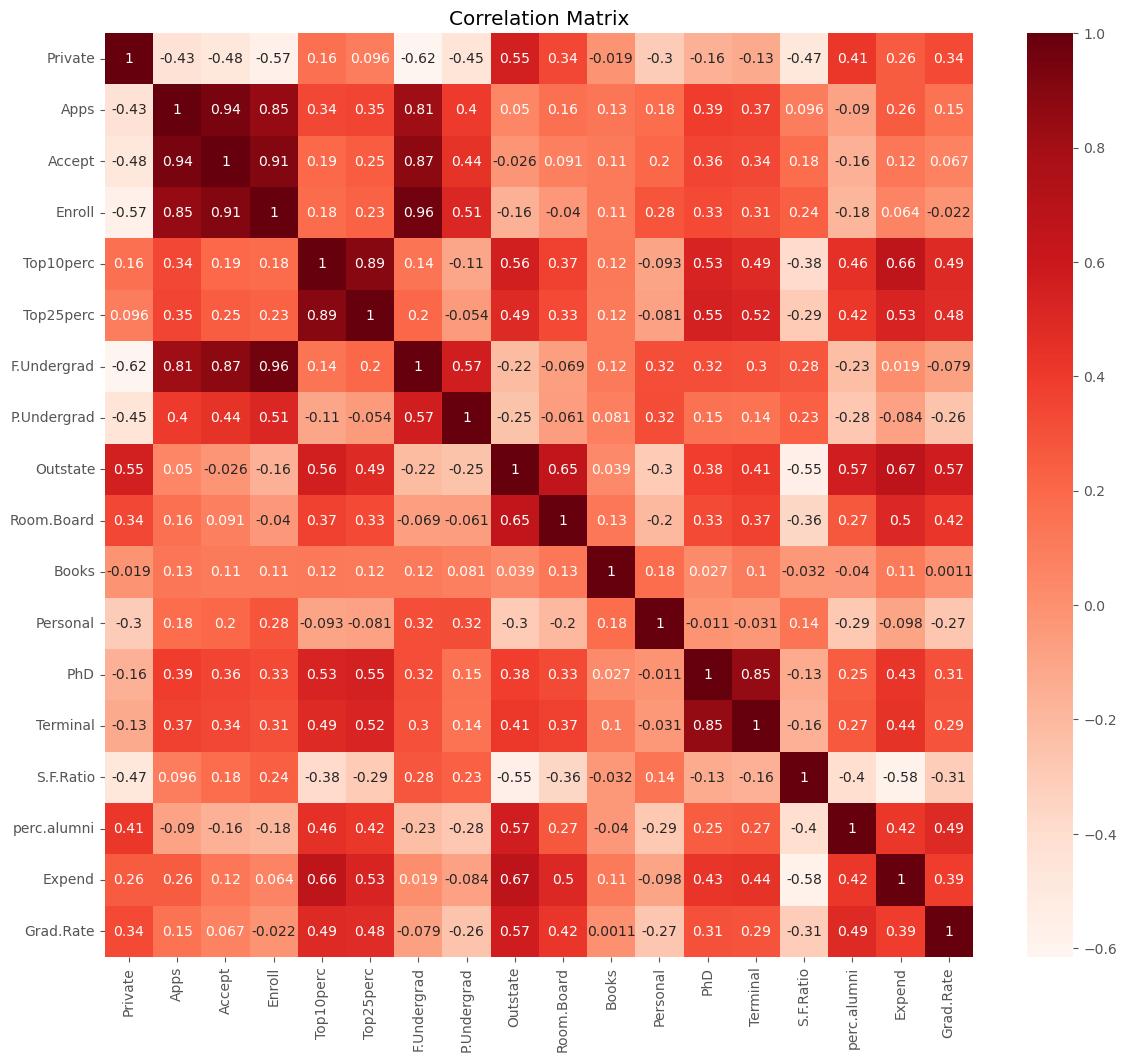

In [8]:
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=0)
plt.title('Correlation Matrix')
plt.show()

# Vẽ biểu đồ Scatter từng đặc trưng với mục tiêu

Lấy ra toàn bộ đặc trưng từ dữ liệu và loại bỏ đi mục tiêu ("Accept")

In [9]:
features = df.drop('Accept', axis=1).columns
print(features)

Index(['Private', 'Apps', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad',
       'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD',
       'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate'],
      dtype='object')


Trực quan từng đặc trưng với mục tiêu

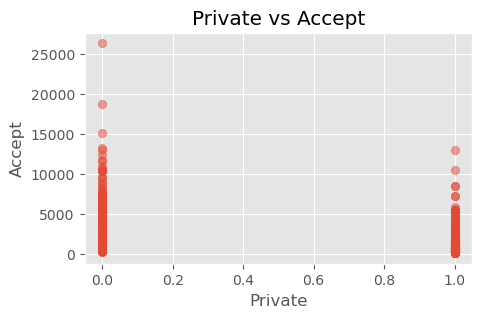

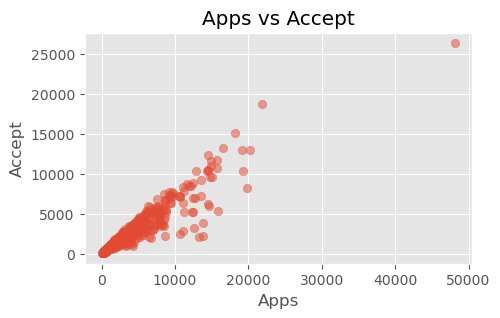

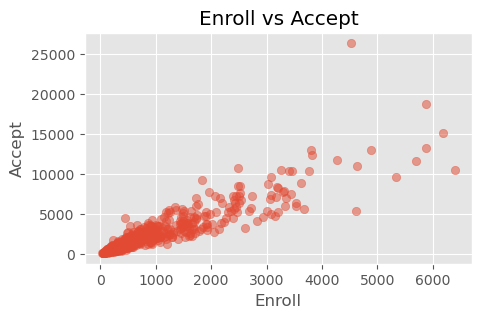

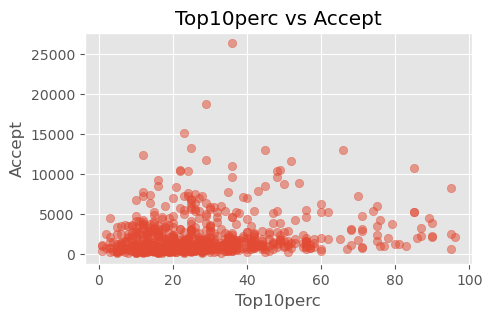

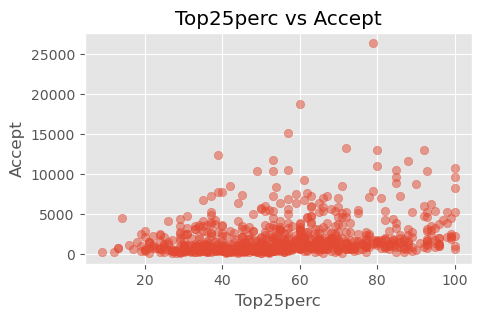

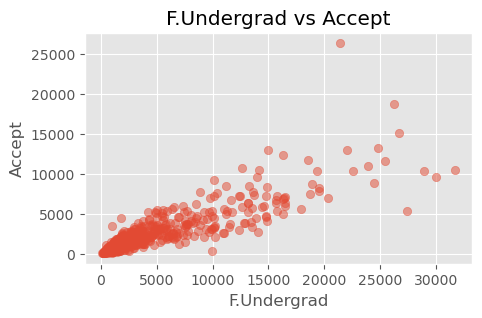

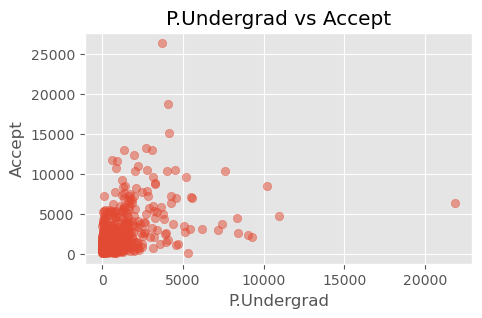

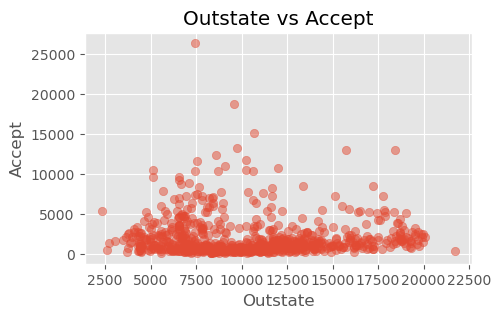

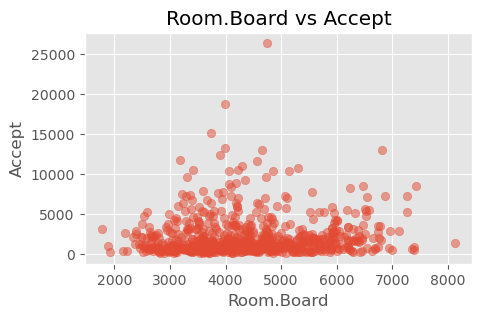

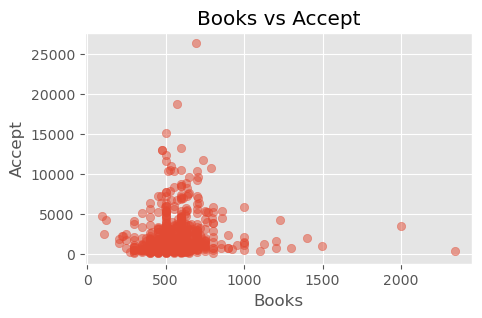

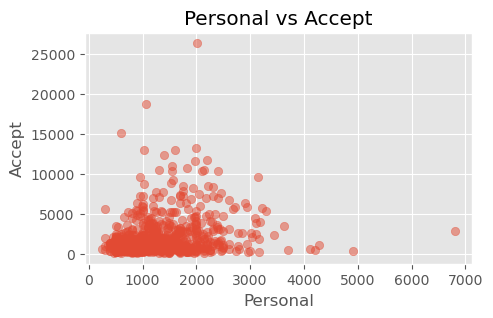

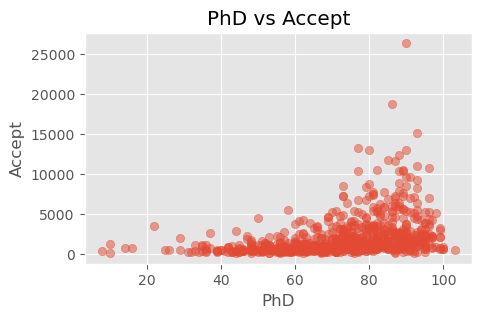

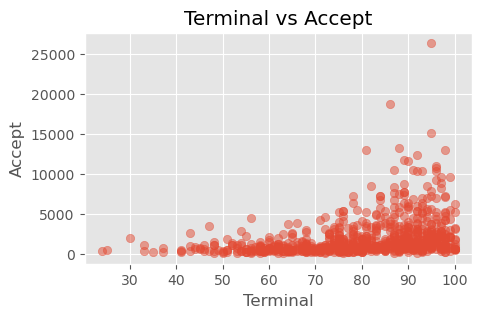

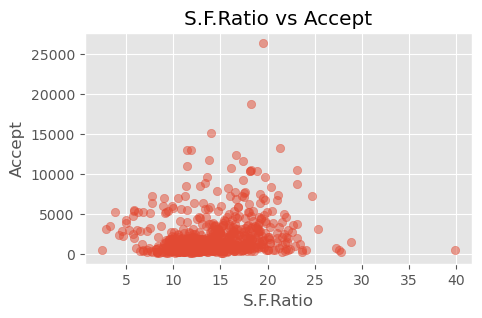

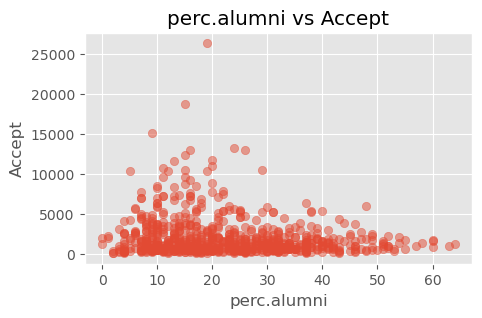

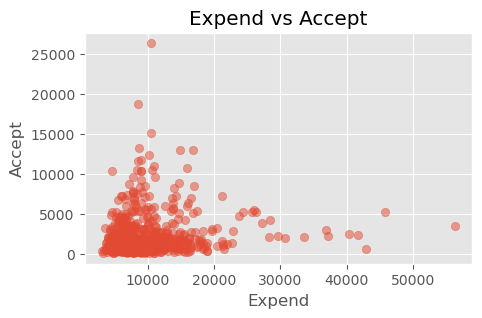

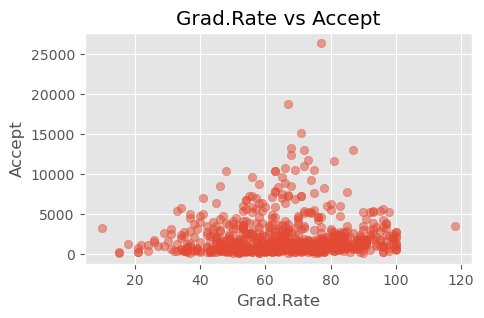

In [10]:
for feature in features:
    plt.figure(figsize=(5, 3))
    plt.scatter(df[feature], df['Accept'], alpha=0.5)
    plt.title(f'{feature} vs Accept')
    plt.xlabel(feature)
    plt.ylabel('Accept')
    plt.grid(True)
    plt.show()

# Phân tách dữ liệu đặc trưng vào X, dữ liệu mục tiêu vào y từ dữ liệu gốc


In [11]:
X = df.drop('Accept', axis=1)
y = df['Accept']

In [12]:
X.head()

,Private,Apps,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1,1660,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,1,2186,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1,1428,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,1,417,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,1,193,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [13]:
y.head()

Abilene Christian University    1232
Adelphi University              1924
Adrian College                  1097
Agnes Scott College              349
Alaska Pacific University        146
Name: Accept, dtype: int64

# Tách dữ liệu thành train/test data
Dữ liệu train chiếm 70% và random_state là 7.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

# 13. Mô hình hóa hồi quy tuyến tính chi phí ăn ở và số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu chi phí ăn ở từ bộ train và test

In [15]:
X_train_rb = X_train[['Room.Board']]
X_test_rb = X_test[['Room.Board']]
y_train_rb = y_train
y_test_rb = y_test

Điều chỉnh shape dữ liệu phù hợp với đầu vào của mô hình

Mô hình hồi quy tuyến tính yêu cầu đầu vào có dạng là (m, n) với X và (m, 1) với y.

Trong đó:

- m là số lượng mẫu quan sát

- n là số lượng đặc trưng

Với một đặc trưng duy nhất, shape phù hợp sẽ là (m, 1) cho X.

In [16]:
X_train_rb = X_train_rb.values.reshape(-1,1)
X_test_rb = X_test_rb.values.reshape(-1,1)
y_train_rb = y_train_rb.values.reshape(-1,1)
y_test_rb = y_test_rb.values.reshape(-1,1)

Xây dựng và huấn luyện mô hình

In [17]:
model_1 = LinearRegression()
model_1.fit(X_train_rb, y_train_rb)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [18]:
r2_score = model_1.score(X_test_rb,y_test_rb)
print(r2_score)

-0.0026669864145500988


Trực quan mô hình hóa với dữ liệu test

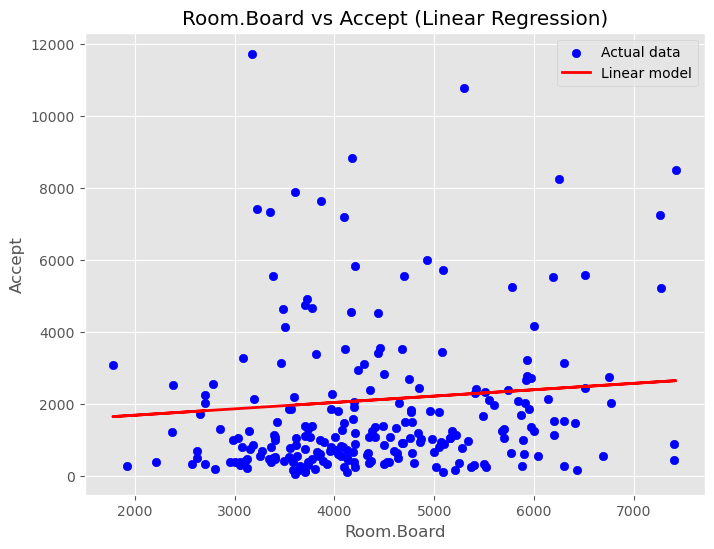

In [19]:
# Dự đoán trên tập test
y_pred = model_1.predict(X_test_rb)

# Trực quan hóa kết quả mô hình
plt.figure(figsize=(8, 6))
plt.scatter(X_test_rb, y_test_rb, color='blue', label='Actual data')
plt.plot(X_test_rb, y_pred, color='red', linewidth=2, label='Linear model')
plt.title('Room.Board vs Accept (Linear Regression)')
plt.xlabel('Room.Board')
plt.ylabel('Accept')
plt.legend()
plt.show()

# Mô hình hóa hồi quy tuyến tính số lượng sinh viên ghi danh cho mỗi trường đại học và số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu số lượng sinh viên ghi danh cho mỗi trường đại học ở từ bộ train và test

In [20]:
X_train_er = X_train[['Enroll']]
X_test_er = X_test[['Enroll']]
y_train_er = y_train
y_test_er = y_test

Điều chỉnh shape phù hợp với đầu vào của mô hình

In [21]:
x_train_er = X_train_er.values.reshape(-1,1)
X_test_er = X_test_er.values.reshape(-1,1)
y_train_er = y_train_er.values.reshape(-1,1)
y_test_er = y_test_er.values.reshape(-1,1)

Xây dựng và huấn luyện mô hình

In [22]:
model_2 = LinearRegression()
model_2.fit(X_train_er,y_train_er)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [23]:
r2_score_er = model_2.score(X_test_er,y_test_er)
print(r2_score_er)

0.8578204867356156


/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Trực quan mô hình với dữ liệu test

R2: 0.8578204867356156
Intercept(s): [151.72611242]


/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


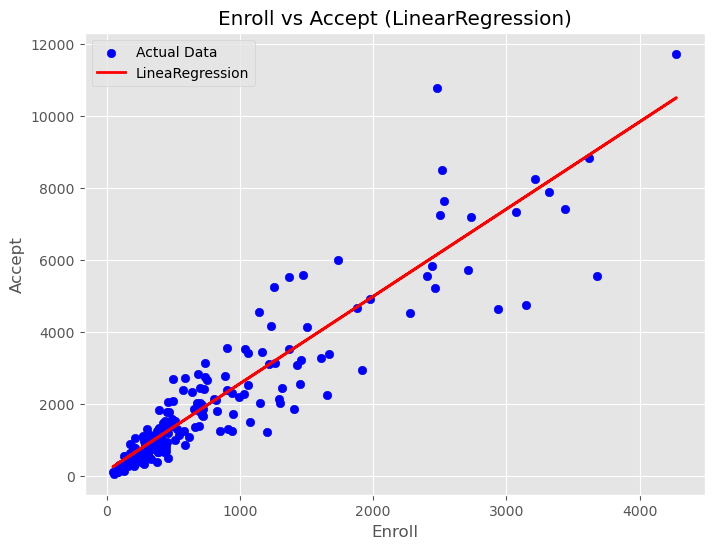

In [24]:
# Trực quan hoá 
print(f'R2: {r2_score_er}')
print(f'Intercept(s): {model_2.intercept_}')

y_pred_er = model_2.predict(X_test_er)
plt.figure(figsize= (8,6))
plt.scatter(X_test_er, y_test_er, color ='blue' , label= "Actual Data")
plt.plot(X_test_er, y_pred_er, color='red',linewidth=2, label=  'LineaRegression')
plt.title('Enroll vs Accept (LinearRegression)')
plt.xlabel('Enroll')
plt.ylabel('Accept')
plt.legend()
plt.show()

# Mô hình hóa hồi quy tuyến tính từng đặc trưng với số lượng sinh viên được chấp nhận và trực quan hóa mô hình với dữ liệu test



R2: 0.22400751013310038
Intercept: 4082.9342105262976


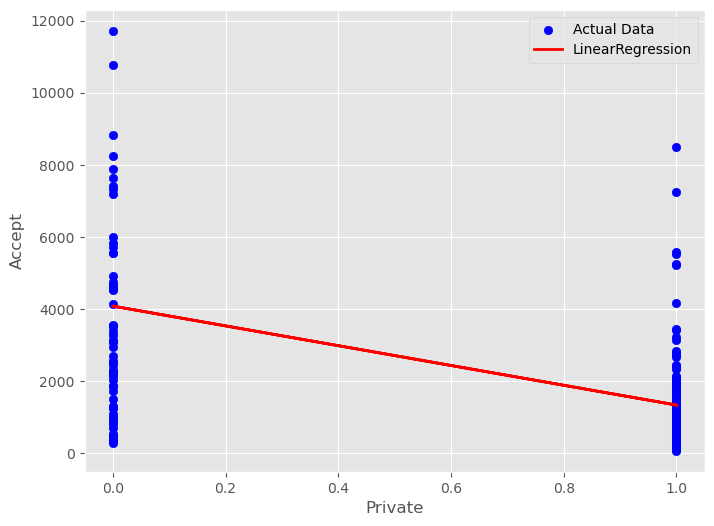

R2: 0.8278338672174986
Intercept: 215.66921083593843


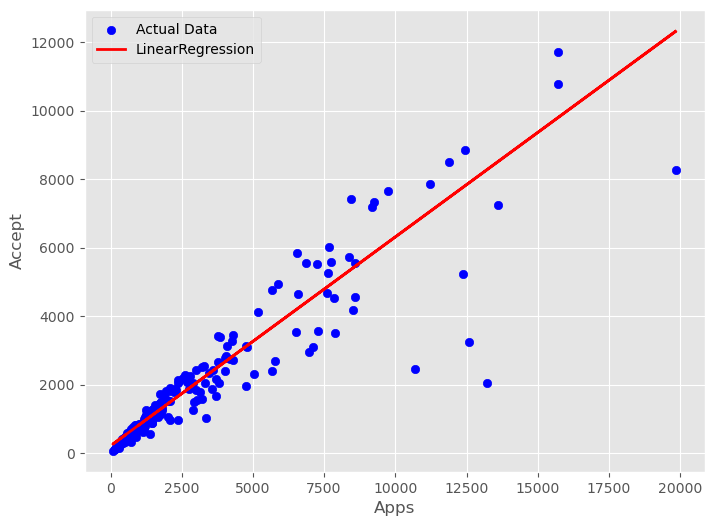

R2: 0.8578204867356156
Intercept: 151.72611242276253


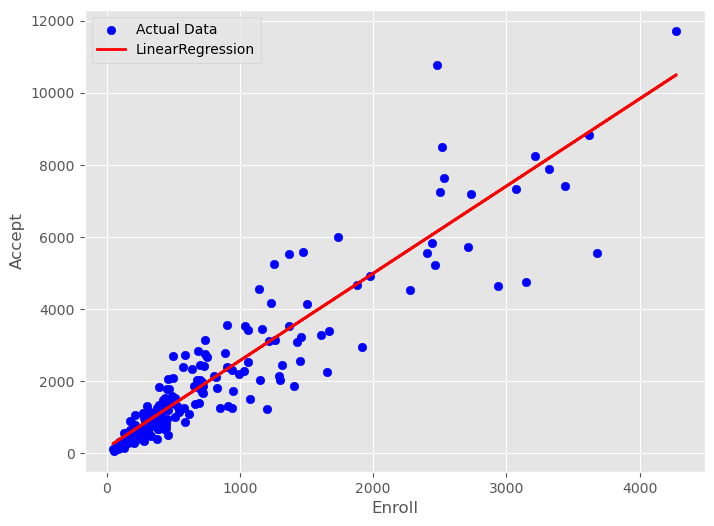

R2: 0.046531790535434325
Intercept: 1397.3784275961898


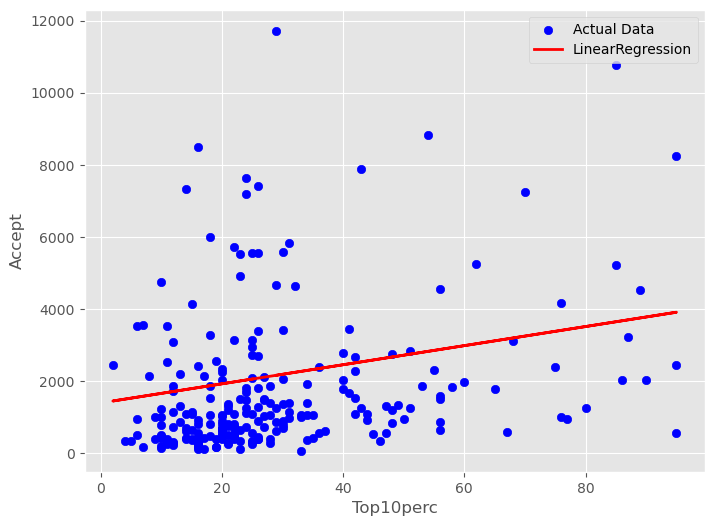

R2: 0.05631647635294568
Intercept: 378.8846828301878


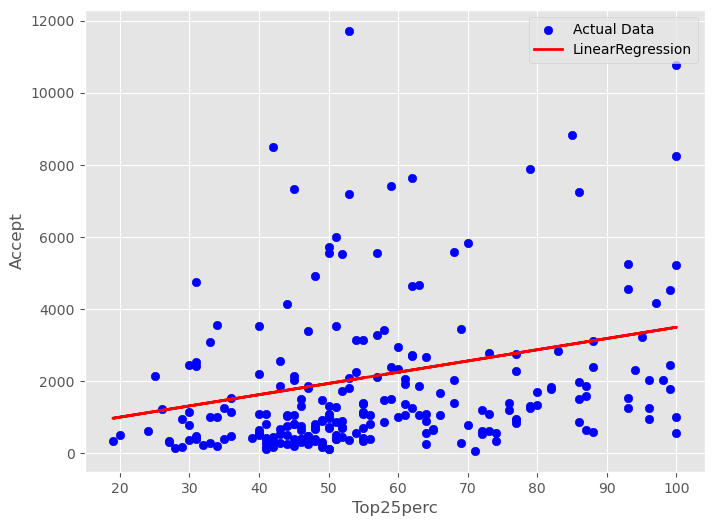

R2: 0.7779917973754006
Intercept: 380.9429104984281


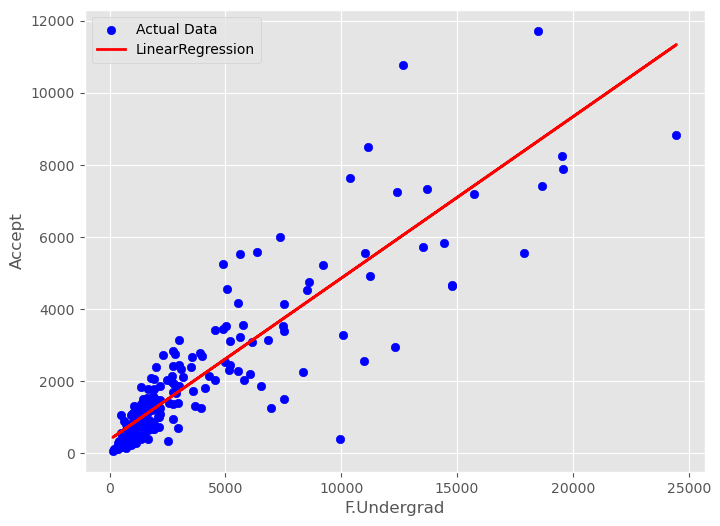

R2: 0.15365724454940077
Intercept: 1444.348151749116


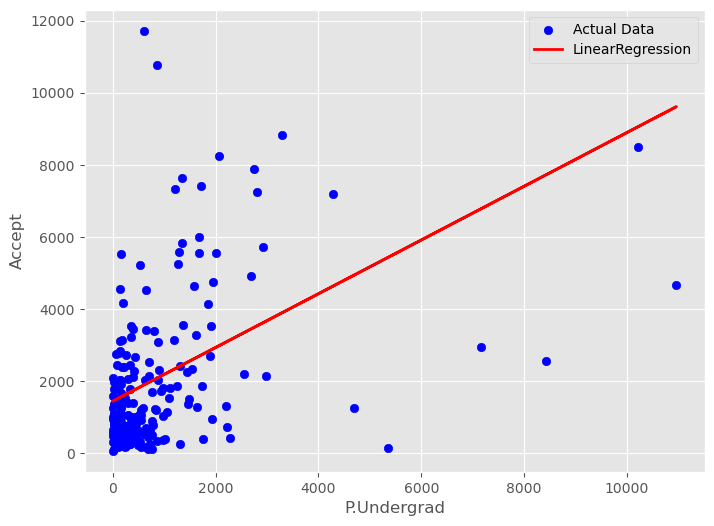

R2: -0.03441717957246171
Intercept: 2472.297811569735


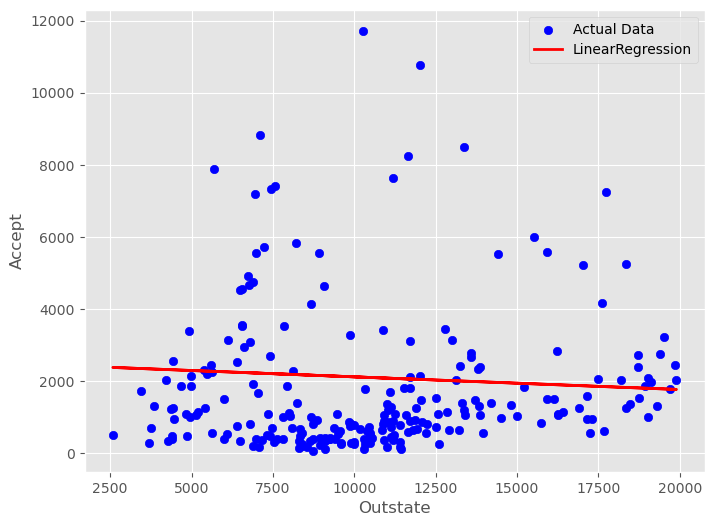

R2: -0.0026669864145500988
Intercept: 1340.6195651898379


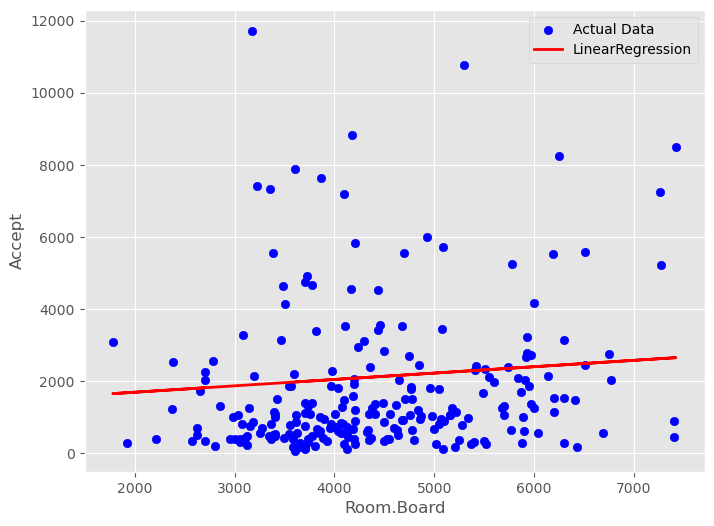

R2: 0.012015078321136241
Intercept: 1304.835595619821


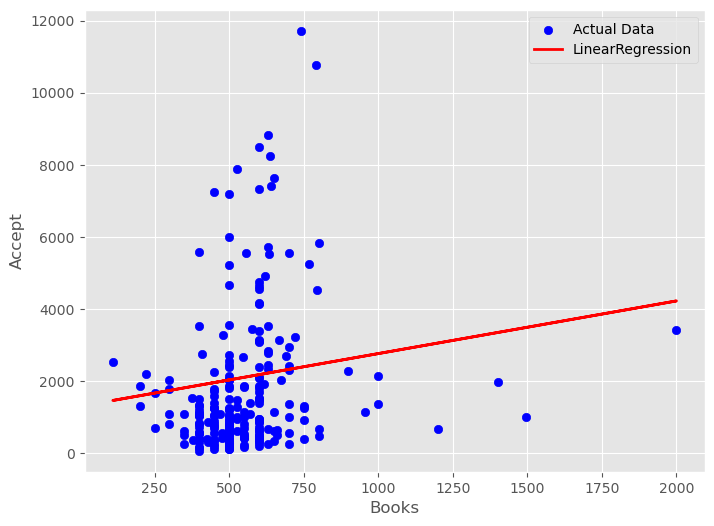

R2: 0.053082024881150436
Intercept: 1185.9756079409444


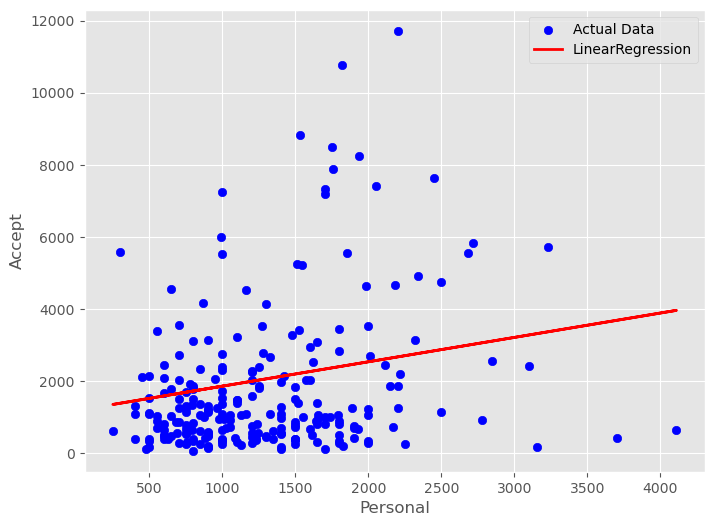

R2: 0.14442475831652202
Intercept: -1901.735682553236


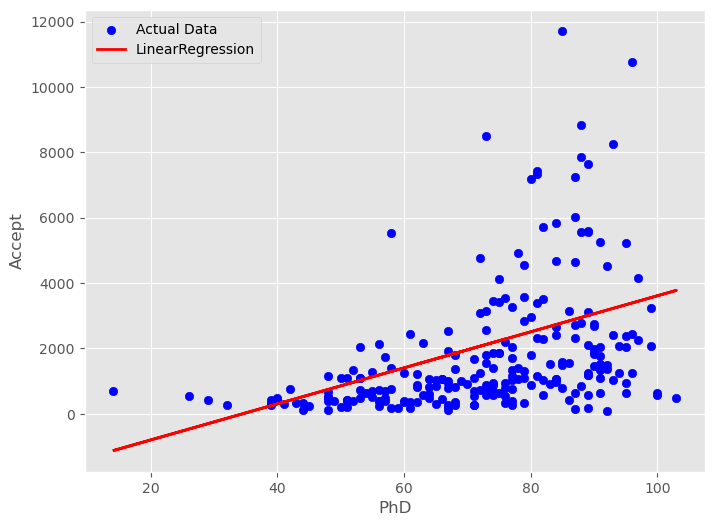

R2: 0.10721305445042717
Intercept: -2566.341123006569


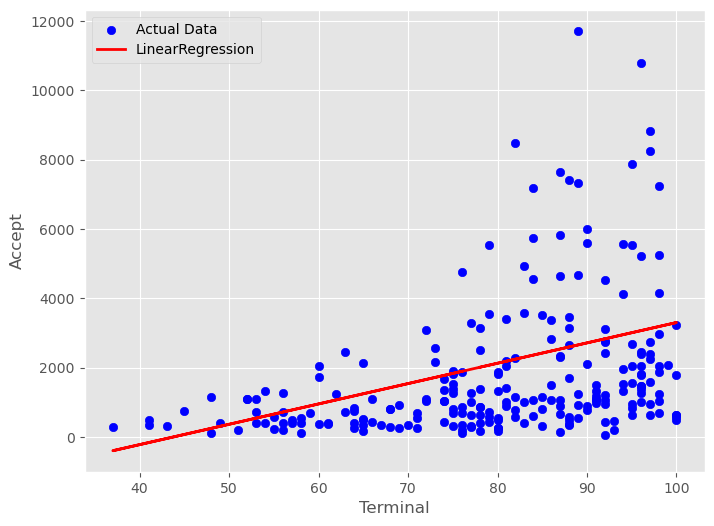

R2: -0.0012154874950456307
Intercept: 406.08920301888634


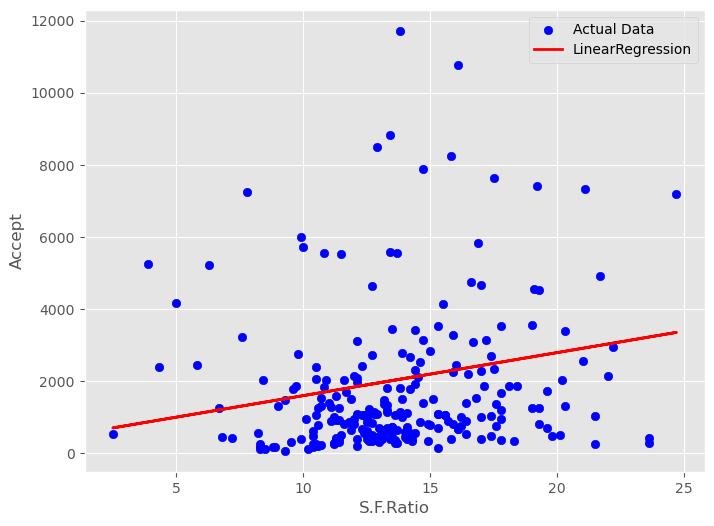

R2: 0.006075121043538134
Intercept: 2869.319570792184


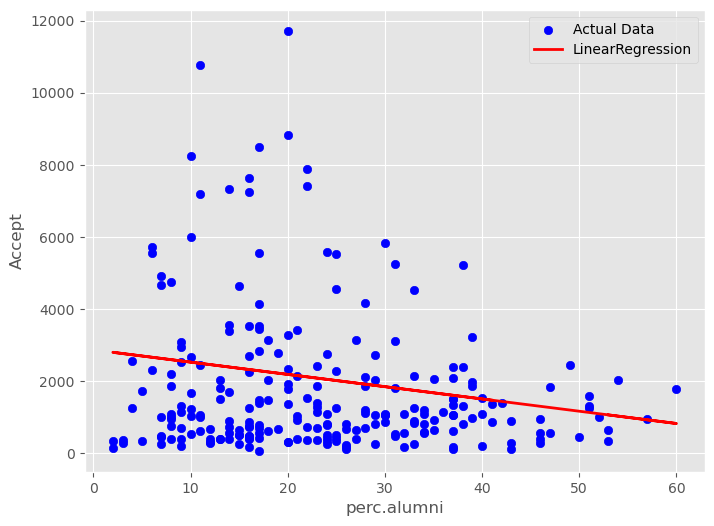

R2: 0.019419509650065114
Intercept: 1652.51677722427


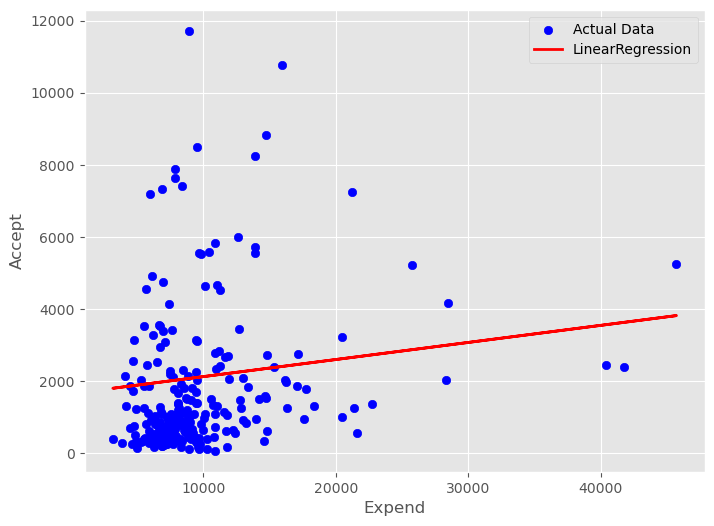

R2: -0.018954776268819362
Intercept: 1407.497460185255


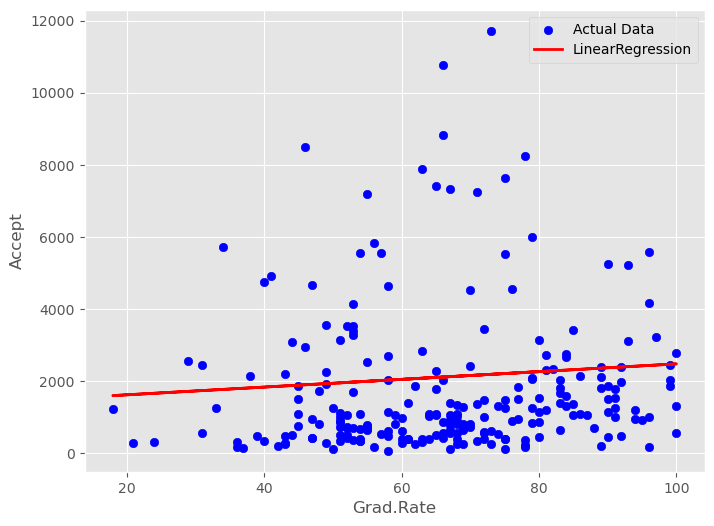

In [25]:
for feature in X_train.columns:
    X_train_feature = X_train[[feature]].values.reshape(-1,1)
    X_test_feature = X_test[[feature]].values.reshape(-1,1)
    model = LinearRegression()
    model.fit(X_train_feature,y_train)

    r2_score_feature = model.score(X_test_feature,y_test)
    
    print(f'R2: {r2_score_feature}')
    print(f'Intercept: {model.intercept_}')

    y_pred = model.predict(X_test_feature)

    plt.figure(figsize=(8,6))
    plt.scatter(X_test_feature, y_test, color =  'blue', label = 'Actual Data')
    plt.plot(X_test_feature, y_pred, color =  'red', linewidth = 2, label = 'LinearRegression')
    plt.xlabel(feature)
    plt.ylabel('Accept')
    plt.legend()
    plt.show()

# 16. Mô hình hóa hồi quy tuyến đa biến số lượng sinh viên ghi danh cho mỗi trường đại học và chi phí ăn ở để dự đoán số lượng sinh viên được chấp nhận và trực quan mô hình

Tách dữ liệu số lượng sinh viên ghi danh cho mỗi trường đại học và chi phí ăn ở từ bộ train và test

In [26]:
X_train_double = X_train[['Enroll','Room.Board']]
X_test_double = X_test[['Enroll','Room.Board']]

Xây dựng và huấn luyện mô hình

In [27]:
model_double = LinearRegression()
model_double.fit(X_train_double, y_train)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [28]:
y_pred_double = model_double.predict(X_test_double)
r2_score_double = model_double.score(X_test_double,y_test)
print(r2_score_double)

0.8764371774214047


Trực quan mô hình với dữ liệu test

R2: 0.8764371774214047
Intercept(s): -1176.6284824940844


/opt/anaconda3/envs/machinelearning/lib/python3.11/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


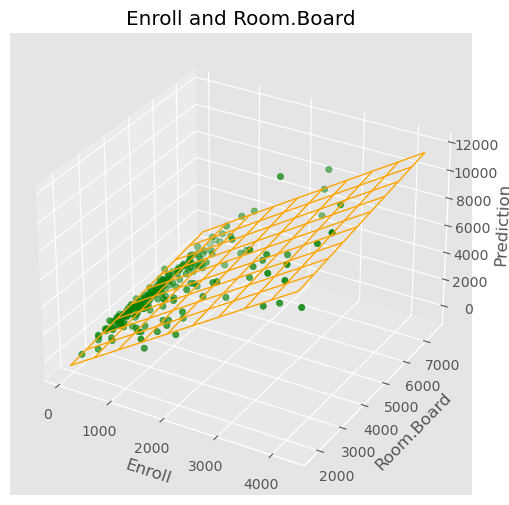

In [29]:
print(f'R2: {r2_score_double}')
print(f'Intercept(s): {model_double.intercept_}')

x_surf, y_surf = np.meshgrid(np.linspace(X_test_double['Enroll'].min(), X_test_double['Enroll'].max(), 10),
                             np.linspace(X_test_double['Room.Board'].min(), X_test_double['Room.Board'].max(), 10))


z_surf = model_double.predict(np.c_[x_surf.ravel(), y_surf.ravel()])
z_surf = z_surf.reshape(x_surf.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')


ax.plot_wireframe(x_surf, y_surf, z_surf, color='orange', linewidth=1)

ax.scatter(X_test_double['Enroll'], X_test_double['Room.Board'], y_test, color='green', label='Actual data')

ax.set_xlabel('Enroll')
ax.set_ylabel('Room.Board')
ax.set_zlabel('Prediction')
ax.set_title('Enroll and Room.Board')

plt.show()


# Sử dụng hồi quy tuyến tính với toàn bộ đặc trưng để quan sát tác động của từng đặc trưng đến mục tiêu

Tạo một bản sao về dữ liệu train và test

In [30]:
X_train_full = X_train.copy()
X_test_full = X_test.copy()
y_train_full = y_train.copy()
y_test_full = y_test.copy()

Điều chỉnh shape phù hợp với đầu vào của mô hình.

Đầu vào của mô hình lúc này sẽ là (m, n).

In [31]:
X_train_full = X_train_full.values.reshape(-1, X_train_full.shape[1])
X_test_full = X_test_full.values.reshape(-1, X_test_full.shape[1])


Trong hồi quy tuyến tính, đặc trưng có miền giá trị lớn hơn sẽ chiếm ưu thế hơn so với đặc trưng có miền giá trị nhỏ hơn. Để công bằng cho tất cả dặc trưng chúng ta sẽ áp dụng một phương pháp được gọi là co dãn đặc trưng

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_full)
X_test_scaled = scaler.transform(X_test_full)


Xây dựng và huấn luyện mô hình

In [33]:
model_full = LinearRegression()
model_full.fit(X_train_scaled, y_train_full)

LinearRegression()

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [34]:
from sklearn.metrics import r2_score
y_pred_full = model_full.predict(X_test_scaled)

r2_score_full = r2_score(y_test_full, y_pred_full)
print(f"R2 Score on Test Set: {r2_score_full}")

R2 Score on Test Set: 0.919628527456307


In [35]:
# Lấy trọng số của các đặc trưng từ mô hình
coefficients = model_full.coef_

# Tạo DataFrame 
feature_importance = pd.DataFrame(coefficients, index=X_train.columns, columns=["Coefficient"]).sort_values(by="Coefficient", ascending=False)
print(feature_importance)

             Coefficient
Apps         1788.195579
Enroll       1166.094588
Outstate      271.437135
Top25perc     152.959466
Private        86.338167
PhD            86.299723
Terminal       16.690016
Books          -4.996008
Room.Board    -12.106168
Personal      -19.553777
Grad.Rate     -26.608065
S.F.Ratio     -36.078715
P.Undergrad   -57.395226
perc.alumni   -62.339947
F.Undergrad  -153.254558
Expend       -160.924662
Top10perc    -497.683550


**Apps có trọng số lớn nhất với giá trị 1788.195579.
Ta thấy rằng số lượng đơn đăng ký (Apps) có tác động mạnh nhất đến số lượng sinh viên được chấp nhận. Cụ thể, khi số lượng đơn đăng ký tăng lên, số lượng sinh viên được chấp nhận cũng có xu hướng tăng mạnh.**

**Books có trọng số nhỏ nhất với giá trị -4.996008.
Chi phí sách (Books) có tác động ít nhất đến số lượng sinh viên được chấp nhận. Ảnh hưởng của nó rất nhỏ, gần như không đáng kể.**

# Xây dựng mô hình hồi quy tuyến tính với các đặc trưng có mối tương quan mạnh với Accept



In [36]:
selected_features = ['Apps', 'Enroll', 'Outstate', 'Top25perc', 'PhD']
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)


In [38]:
model_custom = LinearRegression()

model_custom.fit(X_train_scaled, y_train)

y_pred_custom = model_custom.predict(X_test_scaled)

r2_score_custom = r2_score(y_test, y_pred_custom)
print(f"R2 Score on Test Set: {r2_score_custom}")


R2 Score on Test Set: 0.9022631177804649


# Sử dụng hồi quy Lasso để chọn ra đặc trưng tốt nhất để dự đoán số lượng sinh viên được chấp nhận.

Hồi quy Lasso là hồi quy tuyến tính đặc biệt được tinh chỉnh để có thể đưa các tham số của các đặc trưng không quan trọng tiến về 0 và còn lại các đặc trưng quan trọng.

Alpha càng lớn, tham số của các đặc trưng không quan trọng càng nhỏ và tiến về 0 nhanh.

Tìm giá trị alpha sao cho mô hình đạt R2 score >= 0.92

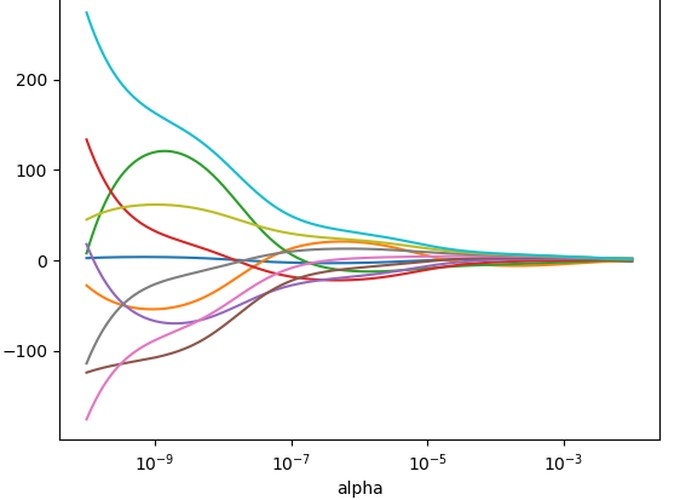

In [39]:
from sklearn.linear_model import Lasso

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Đánh giá chất lượng mô hình bằng chỉ số R2 cho tập test

In [40]:
# Khởi tạo mô hình Lasso với một giá trị alpha ban đầu
alpha = 0.01
lasso_model = Lasso(alpha=alpha, random_state=7)

# Huấn luyện mô hình trên dữ liệu huấn luyện
lasso_model.fit(X_train_scaled, y_train)

# Dự đoán trên tập kiểm tra
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Đánh giá mô hình bằng chỉ số R2
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print(f"Initial R2 Score with alpha={alpha}: {r2_score_lasso}")

Initial R2 Score with alpha=0.01: 0.9196331296633196


Quan sát tham số với từng đặc trưng để kiểm tra xem đặc trưng nào bị loại bỏ bằng phương pháp Lasso

In [41]:
# Thử nghiệm với các giá trị alpha khác nhau
best_alpha = None
best_r2 = 0

for alpha in np.linspace(0.01, 1, 100):
    lasso_model = Lasso(alpha=alpha, random_state=7)
    lasso_model.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_model.predict(X_test_scaled)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    
    if r2_score_lasso >= 0.92 and r2_score_lasso > best_r2:
        best_alpha = alpha
        best_r2 = r2_score_lasso
        
print(f"Best alpha: {best_alpha} with R2 Score: {best_r2}")

Best alpha: 1.0 with R2 Score: 0.9200550430947143


In [42]:
# Huấn luyện mô hình với alpha tốt nhất
lasso_best = Lasso(alpha=best_alpha, random_state=7)
lasso_best.fit(X_train_scaled, y_train)

# Lấy các hệ số của mô hình
coefficients_lasso = lasso_best.coef_

# Tạo DataFrame để dễ quan sát
lasso_feature_importance = pd.DataFrame(coefficients_lasso, index=X_train.columns, columns=["Coefficient"]).sort_values(by="Coefficient", ascending=False)
print(lasso_feature_importance)

             Coefficient
Apps         1785.600927
Enroll       1131.478354
Outstate      267.373995
Top25perc     142.629746
PhD            85.191925
Private        85.184674
Terminal       14.467620
Books          -4.308528
Room.Board     -9.037424
Personal      -19.723989
Grad.Rate     -23.408018
S.F.Ratio     -34.127489
P.Undergrad   -57.079147
perc.alumni   -59.297467
F.Undergrad  -116.220787
Expend       -158.553295
Top10perc    -486.227430


**Không có đặc trưng nào bị loại bỏ trong hồi quy Lasso với giá trị alpha hiện tại, vì tất cả các đặc trưng vẫn có hệ số khác 0.**